In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [3]:
arange = np.arange(7,21,1)
mat_raz = fuzz.trapmf(arange,[11,13,17,19])
fis_raz = fuzz.trapmf(arange,[11,13,17,19])
mat_bom = fuzz.trapmf(arange,[13,18,20,20])
fis_bom = fuzz.trapmf(arange,[13,18,20,20])

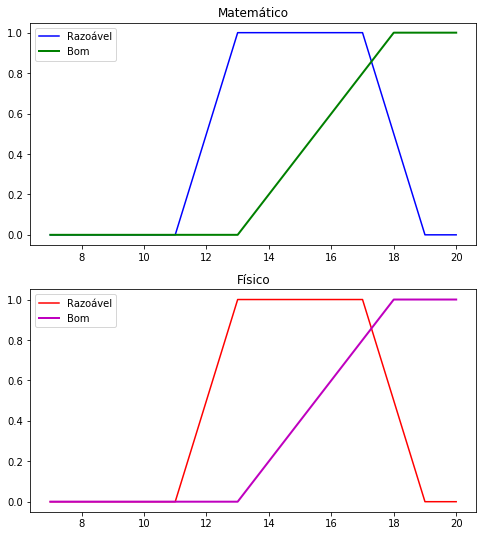

In [4]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8,9))

ax0.plot(arange, mat_raz, 'b', linewidth=1.5, label='Razoável')
ax0.plot(arange,mat_bom,'g',linewidth=2,label='Bom')
ax0.set_title('Matemático')
ax0.legend()

ax1.plot(arange, fis_raz, 'r', linewidth=1.5, label='Razoável')
ax1.plot(arange,fis_bom,'m',linewidth=2,label='Bom')
ax1.set_title('Físico')
ax1.legend()


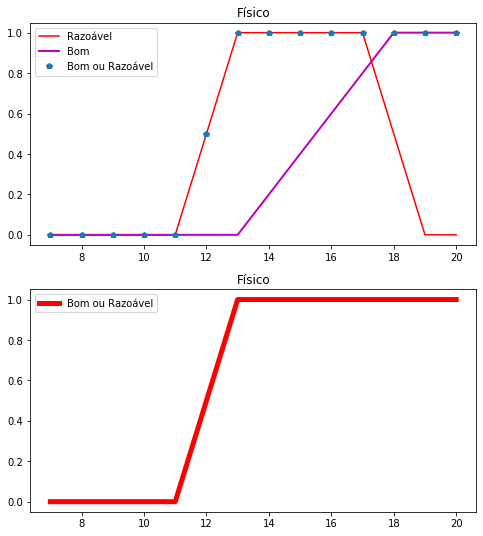

In [28]:
# fuzzy relations
raz_ou_bom_fis = fuzz.fuzzymath.fuzzy_or(arange,fis_raz,arange,fis_bom)

fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(8,9))

ax0.plot(arange, fis_raz, 'r', linewidth=1.5, label='Razoável')
ax0.plot(arange,fis_bom,'m',linewidth=2,label='Bom')
ax0.plot(raz_ou_bom_fis[0],raz_ou_bom_fis[1],'p',linewidth=5,label='Bom ou Razoável')
ax0.set_title('Físico')
ax0.legend()

ax1.plot(raz_ou_bom_fis[0],raz_ou_bom_fis[1],'r',linewidth=5,label='Bom ou Razoável')
ax1.set_title('Físico')
ax1.legend()

In [29]:
import pandas as pd
Notas = {'Mat': [19,12,15,17], 'Fis':[12,17,15,13]}
Notas = pd.DataFrame(Notas,index=list(['Manel','Joao','Maria','Pedro']))


for Pessoa in list(['Manel','Joao','Maria','Pedro']):
    a=fuzz.interp_membership(arange, mat_bom, Notas.Mat.loc[Pessoa])
    b=fuzz.interp_membership(arange, mat_raz, Notas.Mat.loc[Pessoa])
    c=fuzz.interp_membership(arange, fis_bom, Notas.Fis.loc[Pessoa])
    d=fuzz.interp_membership(arange, fis_raz, Notas.Fis.loc[Pessoa])
    print('O '+ Pessoa + ' é')
    print(str(a)+' Bom Matemático')
    print(str(b)+' Matemático Razoável')
    print(str(c)+' Bom Físico')
    print(str(d)+' Físico Razoável')
      
    c_ou_d = fuzz.interp_membership(arange, raz_ou_bom_fis[1], Notas.Fis.loc[Pessoa])
    score = fuzz.fuzzymath.fuzzy_and(arange,a,arange,c_ou_d)
    print(str(c_ou_d) + ' Bom ou Razoável Físico')
    print('Score para ser selecionado ='+str(score[1]))
    
    print('________')

O Manel é
1.0 Bom Matemático
0.0 Matemático Razoável
0.0 Bom Físico
0.5 Físico Razoável
0.5 Bom ou Razoável Físico
Score para ser selecionado =0.5
________
O Joao é
0.0 Bom Matemático
0.5 Matemático Razoável
0.8 Bom Físico
1.0 Físico Razoável
1.0 Bom ou Razoável Físico
Score para ser selecionado =0.0
________
O Maria é
0.4 Bom Matemático
1.0 Matemático Razoável
0.4 Bom Físico
1.0 Físico Razoável
1.0 Bom ou Razoável Físico
Score para ser selecionado =0.4
________
O Pedro é
0.8 Bom Matemático
1.0 Matemático Razoável
0.0 Bom Físico
1.0 Físico Razoável
1.0 Bom ou Razoável Físico
Score para ser selecionado =0.8
________


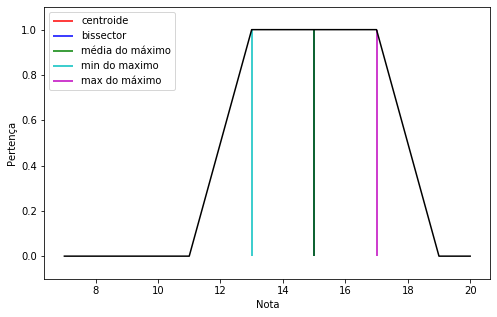

In [38]:
x = arange
mfx = mat_raz

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroide', 'bissector', 'média do máximo', 'min do maximo',
          'max do máximo']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Pertença')
plt.xlabel('Nota')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()

In [42]:
mat_bom

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.4, 0.6, 0.8, 1. , 1. ,
       1. ])

In [41]:
arange

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])